In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plt.rcParams['figure.figsize'] = (8, 6)

In [5]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/MachineLearning/praktikum12/"

df = pd.read_csv(path + '/data/data.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
# Hapus kolom yang tidak dibutuhkan jika ada
cols_to_drop = []

if 'id' in df.columns:
    cols_to_drop.append('id')
if 'Unnamed: 32' in df.columns:
    cols_to_drop.append('Unnamed: 32')

df = df.drop(columns=cols_to_drop)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Pastikan nama kolom diagnosis benar
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [12]:
# Ubah label menjadi numerik: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
X = df.drop(columns=['diagnosis']).values   # semua fitur kecuali diagnosis
y = df['diagnosis'].values                  # label

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # fit + transform (train)
X_test_scaled = scaler.transform(X_test)        # hanya transform (test)

X_train_scaled[:5]

array([[ 5.18558727e-01,  8.91825791e-01,  4.24631702e-01,
         3.83925436e-01, -9.74743706e-01, -6.89771505e-01,
        -6.88586446e-01, -3.98175254e-01, -1.03915470e+00,
        -8.25056321e-01, -1.09317755e-01, -5.59755400e-02,
        -2.10096206e-01, -1.59132582e-02, -1.00518399e+00,
        -9.11941990e-01, -6.62815884e-01, -6.52561081e-01,
        -7.01889114e-01, -2.75393571e-01,  5.79797697e-01,
         1.31324246e+00,  4.66908134e-01,  4.45982711e-01,
        -5.96154777e-01, -6.34722227e-01, -6.10227299e-01,
        -2.35743918e-01,  5.45663235e-02,  2.18367276e-02],
       [-5.16364088e-01, -1.63971029e+00, -5.41348716e-01,
        -5.42961327e-01,  4.76219058e-01, -6.31833818e-01,
        -6.04281166e-01, -3.03074908e-01,  5.21543093e-01,
        -4.54522896e-01, -6.04377961e-01, -1.00104604e+00,
        -5.85429002e-01, -4.93453793e-01,  4.03212009e-01,
        -7.68173276e-01, -4.79187222e-01,  1.14508478e-01,
        -1.42950761e-01, -5.77397732e-01, -5.82458953e-

In [16]:
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

y_pred_no_pca = svm_no_pca.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

print("Akurasi SVM Tanpa PCA:", acc_no_pca)
print("\nClassification Report (Tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=['Benign', 'Malignant']))

Akurasi SVM Tanpa PCA: 0.9736842105263158

Classification Report (Tanpa PCA):
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variansi:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.44593522 0.18545255 0.09584641]
Total Variansi: 0.7272341886241546


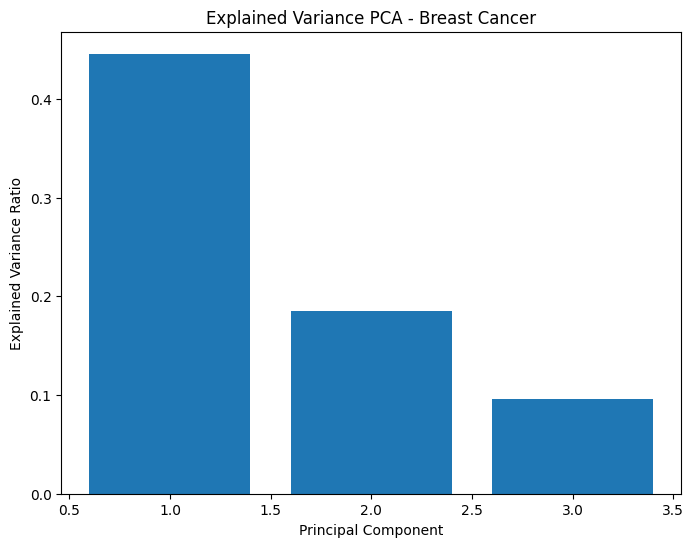

In [18]:
plt.bar(range(1, 4), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance PCA - Breast Cancer")
plt.show()

In [19]:
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Akurasi SVM Dengan PCA:", acc_pca)
print("\nClassification Report (Dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=['Benign', 'Malignant']))

Akurasi SVM Dengan PCA: 0.956140350877193

Classification Report (Dengan PCA):
              precision    recall  f1-score   support

      Benign       0.94      1.00      0.97        72
   Malignant       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



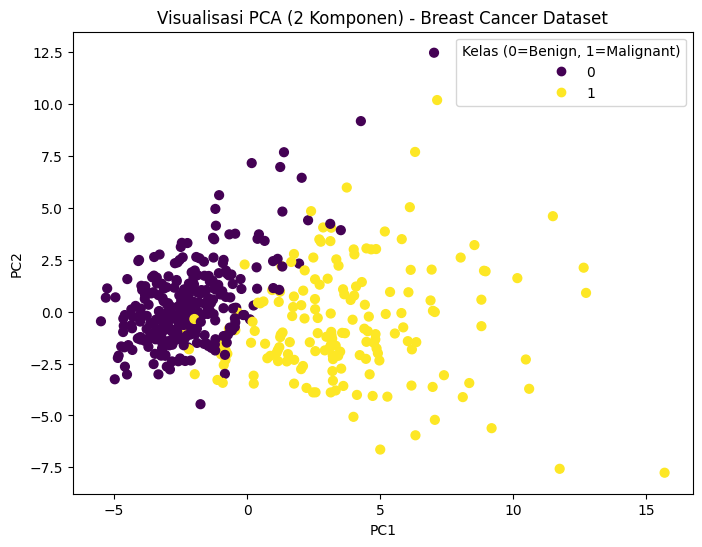

In [20]:
pca_2d = PCA(n_components=2)
X_train_pca2 = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_pca2[:, 0],
    X_train_pca2[:, 1],
    c=y_train,
    s=40
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisasi PCA (2 Komponen) - Breast Cancer Dataset')
plt.legend(*scatter.legend_elements(), title="Kelas (0=Benign, 1=Malignant)")
plt.show()

In [21]:
print("Akurasi Tanpa PCA:", acc_no_pca)
print("Akurasi Dengan PCA:", acc_pca)
print("Total Variansi (3 Komponen PCA):", sum(pca.explained_variance_ratio_))

Akurasi Tanpa PCA: 0.9736842105263158
Akurasi Dengan PCA: 0.956140350877193
Total Variansi (3 Komponen PCA): 0.7272341886241546
